In [ ]:
# Name: Zita Lo
# Student Number: 20196119
# Program: MMA
# Cohort: Winter 2021
# Course Number: MMA 869
# Date: August 13, 2020


# Answer to Question 1
# See Assignment1_869_Q1_ZitaLo.py for Final Result
# This is supplementary code - Pycaret 2.0 (HClust and Kmeans)


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read in data
df = pd.read_csv("jewelry_customers.csv")

# EDA

In [4]:
df.head()
df.info()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


# PyCaret

In [5]:
# Set up data for clustering
from pycaret.clustering import *

clu1 = setup(df, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.9, 
             session_id=123, log_experiment=True, log_plots = True, 
             transformation=True,          
             ignore_low_variance = True )





Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(505, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


2020/08/13 10:42:17 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [6]:
# Display the data after set up
clu1

(          Age    Income  SpendingScore   Savings
 0    0.013700  0.104533       1.095834 -1.076586
 1    0.054429  0.213185       1.095079 -1.302050
 2    0.175578  0.022564       0.815269 -0.537259
 3    0.054429  0.012260       1.016603 -0.920296
 4    1.134368 -1.680274      -0.533657  1.016885
 ..        ...       ...            ...       ...
 500 -1.316147  0.725017      -0.364514  0.618524
 501  1.353305 -1.606098      -1.233624  1.244567
 502  1.244304 -1.112404      -0.505343  0.856251
 503  1.280740 -1.580922      -0.507425  1.334014
 504  1.207765 -1.269220      -0.806770  0.505479
 
 [505 rows x 4 columns],
      Age  Income  SpendingScore       Savings
 0     58   77769       0.791329   6559.829923
 1     59   81799       0.791082   5417.661426
 2     62   74751       0.702657   9258.992965
 3     59   74373       0.765680   7346.334504
 4     87   17760       0.348778  16869.507130
 ..   ...     ...            ...           ...
 500   28  101206       0.387441  14936.7753

In [7]:
# Call out the transformed data

type(clu1)
transformedData = clu1[5][2][1]
print(transformedData)

tuple

          Age    Income  SpendingScore   Savings
0    0.013700  0.104533       1.095834 -1.076586
1    0.054429  0.213185       1.095079 -1.302050
2    0.175578  0.022564       0.815269 -0.537259
3    0.054429  0.012260       1.016603 -0.920296
4    1.134368 -1.680274      -0.533657  1.016885
..        ...       ...            ...       ...
500 -1.316147  0.725017      -0.364514  0.618524
501  1.353305 -1.606098      -1.233624  1.244567
502  1.244304 -1.112404      -0.505343  0.856251
503  1.280740 -1.580922      -0.507425  1.334014
504  1.207765 -1.269220      -0.806770  0.505479

[505 rows x 4 columns]


In [8]:
# Create models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [14]:
# Create kmeans model
kmeans = create_model('kmeans', num_clusters = 5)


,Metric
Silhouette,0.8063
Calinski-Harabasz,3503.4024
Davies-Bouldin,0.2748


<Figure size 576x396 with 0 Axes>

In [12]:
# Assign kmeans model and export to csv
kmeans_results = assign_model(kmeans)
kmeans_results.head()
kmeans_results.to_csv('kmeans_results_pycaret.csv')

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 5


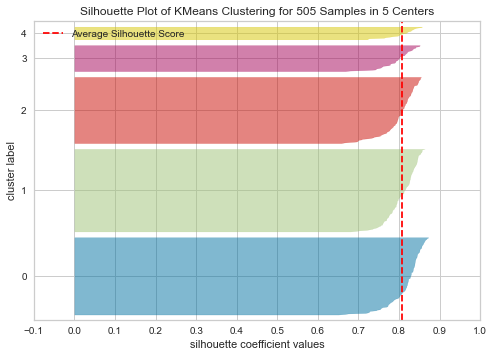

In [68]:
# Plot silhouette graph
plot_model(kmeans, plot = 'silhouette')

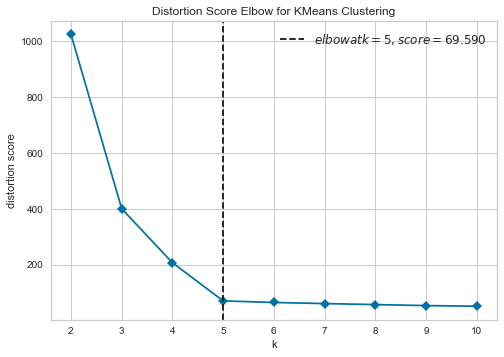

In [71]:
# Plot kmeans elbow graph
plot_model(kmeans, plot = 'elbow')

In [69]:
# Plot kmeans cluster graph with PCA components
plot_model(kmeans)

In [13]:
# Create hierarchical clustering
hclust = create_model('hclust', num_clusters = 5)

,Metric
Silhouette,0.8063
Calinski-Harabasz,3503.4024
Davies-Bouldin,0.2748


<Figure size 576x396 with 0 Axes>

In [15]:
# Print out to see hclust parameters
hclust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [75]:
# Set up different parameter for hierarchical clustering
# Score the same as hclust
hclust1 = create_model('hclust', affinity='correlation',linkage='complete',num_clusters = 5)

,Metric
Silhouette,0.8063
Calinski-Harabasz,3503.4024
Davies-Bouldin,0.2748


<Figure size 576x396 with 0 Axes>

In [76]:
# Print out to see hclust1 parameters
hclust1

AgglomerativeClustering(affinity='correlation', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5)

In [16]:
# View labels of hclust
hclust.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [70]:
# Plot model in a 2d chart using PCA components
plot_model(hclust)

In [17]:
# Assign model to data and explort results to csv file
hclust_results = assign_model(hclust)
hclust_results.head()
hclust_results['Cluster'].value_counts()
hclust_results.reset_index(inplace = True, drop = True) 
hclust_results.to_csv('hclust_results_pycaret.csv')

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0


Cluster 1    157
Cluster 0    147
Cluster 2    126
Cluster 3     50
Cluster 4     25
Name: Cluster, dtype: int64

# Intepreting the clusters

# Means of each cluster and Examplar

In [27]:
from scipy.spatial import distance

#  Step 1 - Calulcate the mean of each cluster first
labels = hclust_results['Cluster'].str.replace('Cluster','')
#labels

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

K = 5
X= hclust_results.drop(columns =['Cluster'])
#hclust_results.shape[1]

# hclust_results.shape
# shape is 5 x 505
means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(means[i,:])
    
means
pd.DataFrame(means).to_csv('means_byCluster.csv')

# -----------------------------------
# Step 2 - Based on the means from step 1, calulcate examplar for each cluster

i=0
unique_id_list = list()


for i, label in enumerate(set(labels)):
    X_tmp= X[labels ==label].copy()
    
    # Euclidean distance 
    #exemplar_idx = distance.cdist([means[i]], X_tmp).argmin()
    
    #cosine distance
    exemplar_idx = distance.cdist([means[i]], X_tmp,metric='cosine').argmin()   
    
 
    print('exemplar start')
    print('\nCluster {}:'.format(label))
    display(X_tmp.iloc[[exemplar_idx]])
    print('exemplar end ************' + '\n')
    
    



Cluster  2 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster  0 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster  1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster  3 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster  4 (n=25):
[    86.   119944.04      0.07  14808.68]


array([[    32.78, 105265.81,      0.31,  14962.78],
       [    87.78,  27866.1 ,      0.33,  16659.26],
       [    59.96,  72448.06,      0.77,   6889.97],
       [    24.18, 128029.12,      0.9 ,   4087.52],
       [    86.  , 119944.04,      0.07,  14808.68]])

exemplar start

Cluster  2:


,Age,Income,SpendingScore,Savings
168,33,111813,0.238244,15901.238968


exemplar end ************

exemplar start

Cluster  0:


,Age,Income,SpendingScore,Savings
376,87,25566,0.31676,15188.058749


exemplar end ************

exemplar start

Cluster  1:


,Age,Income,SpendingScore,Savings
364,58,80248,0.724956,7641.160382


exemplar end ************

exemplar start

Cluster  3:


,Age,Income,SpendingScore,Savings
217,23,129937,0.872736,4102.065425


exemplar end ************

exemplar start

Cluster  4:


,Age,Income,SpendingScore,Savings
427,86,124372,0.0,15374.465953


exemplar end ************



# Means of each cluster (another way to calculate)

In [28]:
# Used panda's group-by function to calculate means
import pandas as pd

X_df = pd.DataFrame(hclust_results, columns=hclust_results.columns)
cl_group = X_df.groupby(['Cluster']).agg('describe')
cl_group

cl_group.info()

print('\n\n','Group by Cluster - Means of Age: ')
cl_group['Age']

print('\n\n','Group by Cluster - Means of Spending Score: ')
cl_group['SpendingScore']

print('\n\n','Group by Cluster - Means of Income: ')
cl_group['Income']

print('\n\n','Group by Cluster - Means of Savings: ')
cl_group['Savings']




Age                                                    Income  \
           count       mean       std   min   25%   50%   75%   max  count   
Cluster                                                                      
Cluster 0  147.0  87.775510  3.508885  79.0  85.0  88.0  91.0  97.0  147.0   
Cluster 1  157.0  59.955414  3.376662  51.0  58.0  59.0  62.0  68.0  157.0   
Cluster 2  126.0  32.777778  3.792390  22.0  30.0  33.0  35.0  44.0  126.0   
Cluster 3   50.0  24.180000  3.662775  17.0  22.0  24.5  27.0  31.0   50.0   
Cluster 4   25.0  86.000000  3.662877  77.0  84.0  86.0  88.0  93.0   25.0   

                          ... SpendingScore           Savings                \
                    mean  ...           75%       max   count          mean   
Cluster                   ...                                                 
Cluster 0   27866.102041  ...      0.357267  0.473550   147.0  16659.261445   
Cluster 1   72448.063694  ...      0.800598  0.910417   157.0   6889.972190   
Cluster 2  105265.809524  ...      0.341096  0.411112   126.0  14962.778066   
Cluster 3  128029.120000  ...      0.926473  1.000000    50.0   4087.520309   
Cluster 4  119944.040000  ...      0.082723  0.155694    25.0  14808.683793   

                                                                  \
                   std           min           25%           50%   
Cluster                                                            
Cluster 0  1183.850178  13470.970605  15957.282919  16711.067980   
Cluster 1  1052.276354   4077.658657   6225.376082   6845.056822   
Cluster 2  1061.734017  12207.526078  14223.787562  14976.943192   
Cluster 3  1277.754801      0.000000   3275.320193   4361.967019   
Cluster 4  1159.339639  12554.692742  14047.388986  14773.407206   

                                       
                    75%           max  
Cluster                                
Cluster 0  17433.126684  20000.000000  
Cluster 1   7497.231607  10547.775368  
Cluster 2  15682.288845  17968.553929  
Cluster 3   4986.863329   6089.478323  
Cluster 4  15391.952192  17833.093470  

[5 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Cluster 0 to Cluster 4
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Age, count)            5 non-null      float64
 1   (Age, mean)             5 non-null      float64
 2   (Age, std)              5 non-null      float64
 3   (Age, min)              5 non-null      float64
 4   (Age, 25%)              5 non-null      float64
 5   (Age, 50%)              5 non-null      float64
 6   (Age, 75%)              5 non-null      float64
 7   (Age, max)              5 non-null      float64
 8   (Income, count)         5 non-null      float64
 9   (Income, mean)          5 non-null      float64
 10  (Income, std)           5 non-null      float64
 11  (Income, min)           5 non-null      float64
 12  (Income, 25%)           5 non-null      float64
 13  (Income, 50%)           5 non-null      float64
 14  (Income, 75%)           5 non-null 

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 0,147.0,87.775510,3.508885,79.0,85.0,88.0,91.0,97.0
Cluster 1,157.0,59.955414,3.376662,51.0,58.0,59.0,62.0,68.0
Cluster 2,126.0,32.777778,3.792390,22.0,30.0,33.0,35.0,44.0
Cluster 3,50.0,24.180000,3.662775,17.0,22.0,24.5,27.0,31.0
Cluster 4,25.0,86.000000,3.662877,77.0,84.0,86.0,88.0,93.0




 Group by Cluster - Means of Spending Score: 


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 0,147.0,0.328800,0.045224,0.203140,0.301502,0.324719,0.357267,0.473550
Cluster 1,157.0,0.771518,0.046058,0.657314,0.740367,0.766720,0.800598,0.910417
Cluster 2,126.0,0.309926,0.045513,0.174120,0.281237,0.309479,0.341096,0.411112
Cluster 3,50.0,0.896892,0.043466,0.806553,0.871957,0.890676,0.926473,1.000000
Cluster 4,25.0,0.068378,0.039744,0.000000,0.036795,0.063273,0.082723,0.155694




 Group by Cluster - Means of Income: 


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 0,147.0,27866.102041,6448.805481,12000.0,23361.00,27771.0,32601.00,46977.0
Cluster 1,157.0,72448.063694,6240.260008,56321.0,68463.00,72027.0,76594.00,90422.0
Cluster 2,126.0,105265.809524,6080.621753,89598.0,100760.25,106002.5,108858.75,119877.0
Cluster 3,50.0,128029.120000,5688.904656,117108.0,123042.00,128162.0,131435.75,142000.0
Cluster 4,25.0,119944.040000,4941.052254,110582.0,117347.00,119429.0,123651.00,128596.0




 Group by Cluster - Means of Savings: 


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 0,147.0,16659.261445,1183.850178,13470.970605,15957.282919,16711.067980,17433.126684,20000.000000
Cluster 1,157.0,6889.972190,1052.276354,4077.658657,6225.376082,6845.056822,7497.231607,10547.775368
Cluster 2,126.0,14962.778066,1061.734017,12207.526078,14223.787562,14976.943192,15682.288845,17968.553929
Cluster 3,50.0,4087.520309,1277.754801,0.000000,3275.320193,4361.967019,4986.863329,6089.478323
Cluster 4,25.0,14808.683793,1159.339639,12554.692742,14047.388986,14773.407206,15391.952192,17833.093470


# Relative Importance Plots

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Relative importance of features')

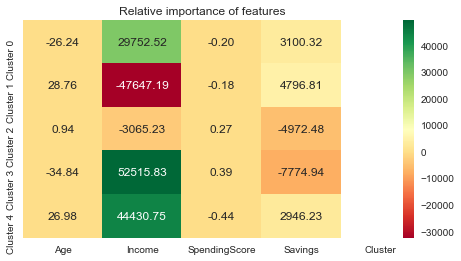

In [67]:
# The idea here is to understand how does each feature compared to overall customers
# Greener = higher value than population
# Redder = lower value than population
# Yellow = same value as population

all_means = X.mean(axis=0)

relative_imp = means - all_means.to_numpy()
col_names = hclust_results.columns

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=relative_imp, 
            #annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
plt.savefig('mall_heatmap_pycaret_hclust.png')